# Project: Investigate a Dataset - [No Show Appointment]

● In this project we will analyze 110.527 medical appointments with its 14 associated variables.<br>
  From this dataset we want to analyze the patient behavior of showing or not showing to their appointments.<br>
  
  Some of the features are not answering our questions and some are let's descover some of these features:-<br> 

## Describing the features 

● ‘ScheduledDay’ indicates the day our patient called or registered the appointment.<br>
● ‘Neighborhood’ indicates where the appointment takes place.<br>
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.<br>

## Questions to be answered:
1- What is the distribution of the appointment for showing or not ?<br>
2- How each factor ("Age", "Gender", "Scholarship", "Alchoholi", "Having as SMS") affects the appointements rates ?

In [1]:
# importing the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Data Wrangling
>Check for cleanliness, and then trim and clean the dataset before analysis

## Generel Properties 

In [4]:
# Load the data. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [49]:
#summary of the data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [50]:
# No Null Values 
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Looking for Data that need to be cleaned
>Looking for the duplicated Patient IDs with the same status of No_show.

In [51]:
df[df['Gender'] ==  37.08887421173107]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> Check for the Age feature as we found value of "-1" in df.describe() 

In [52]:
df[df["Age"] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No



### Data Cleaning
> Fixing Typos in the column names
 

In [53]:
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

> Converting the Schedule Day and Appointment Day into Date time 

In [54]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

>fixing the ages that are less then 0 by taking the mean of all ages and put those values into it

In [55]:
mean_age = df['Age'].mean()
df[df['Age'] <= 0] = mean_age

> For making the data more representative and plotable, we will convert the No_show values from No, Yes into 0,1

In [56]:
df.drop(df[df['Age'] == 37.08887421173107].index, inplace = True)

In [57]:
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed
print(type(showed), type(df['Age']))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (What is the distribution of the appointment for showing or not ?)

79.7358557582


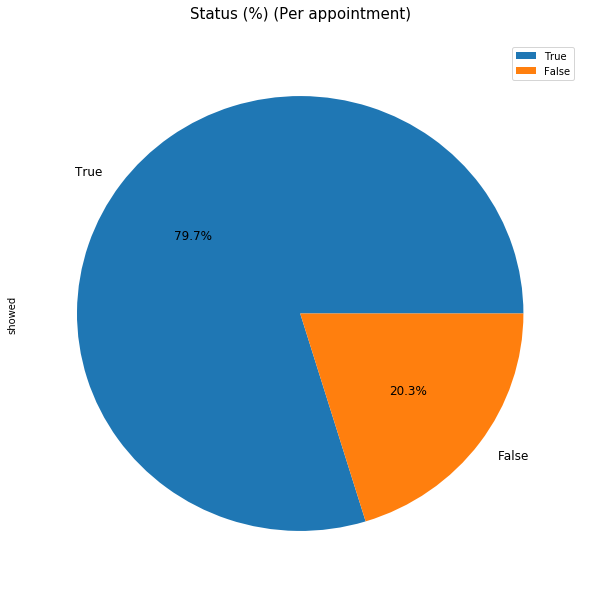

In [59]:
total_attend = df['showed'].value_counts()
print(total_attend[1] / total_attend.sum() * 100)
pieChart = total_attend.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

## Summary :
### Answering question 1 : 
> We can see that 79.7 % of the appointments is made. So we need to study what the features affecting the appointment rate

### Research Question 2  (How each factor ["Age", "Gender", "Scholarship", "Alchoholic", "Receiving SMS"] affects the appointements rates ?)

### The average age of people who show up and people who didn't


In [60]:
df.Age[showed].mean() , df.Age[not_showed].mean()

(39.075187264820002, 35.329151291512915)

Showed Appointment Rate affected by Age = 39.07518726482
Not Showed Appointment Rate affected by Age = 35.329151291512915


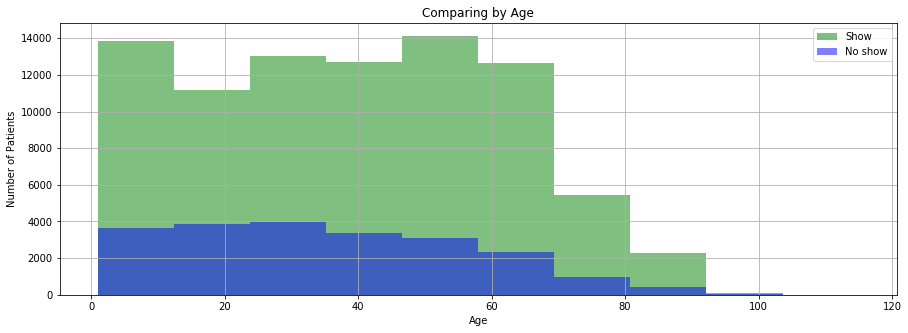

In [61]:
def committment_hist (df, col_name, showed, not_showed):
    ''' This function is for plotting the effect of a specific feature "col_name" on the showing and not showing results.
        
        Paramaters :
            df (pd.DataFrame): the DataFrame we need to study.
            col_name (pd.Series): the specific coulmn we need to study its effect.
            showed (pd.Series): the mask for the showed dataset.
            not_showed (pd.Series): the mask for the not showed dataset.
            
        Returns :
            NA
        
        Outputs :
            1- Printing the Summary of the feature effect on the dataset. 
            2- Plotting the histogram of the desired feature in the showed and not showed groups. 
    '''
    try :
        print('Showed Appointment Rate affected by {} = {}'.format(col_name,df[col_name][showed].mean()))
        print('Not Showed Appointment Rate affected by {} = {}'.format(col_name,df[col_name][not_showed].mean()))
    except:
        print('The categories percentage in the showed group in ',  df.groupby(col_name)['showed'].mean())
    plt.figure(figsize= (15,5))
    df[col_name][showed].hist(alpha= 0.5, bins= 10, color= 'green', label= 'Show')
    df[col_name][not_showed].hist(alpha= 0.5, bins= 10, color= 'blue', label= 'No show')
    plt.legend();
    plt.title('Comparing by {}'.format(col_name))
    plt.xlabel('{}'.format(col_name))
    plt.ylabel('Number of Patients')

committment_hist(df, 'Age', showed, not_showed);


### Age Effect on Appointment Rate:
>The average of the age for people who will be most likely to show up is 39.0 and the average age for people who are not likely to show up is 35.3. 

The categories percentage in the showed group in  Gender
F    0.796415
M    0.799154
Name: showed, dtype: float64


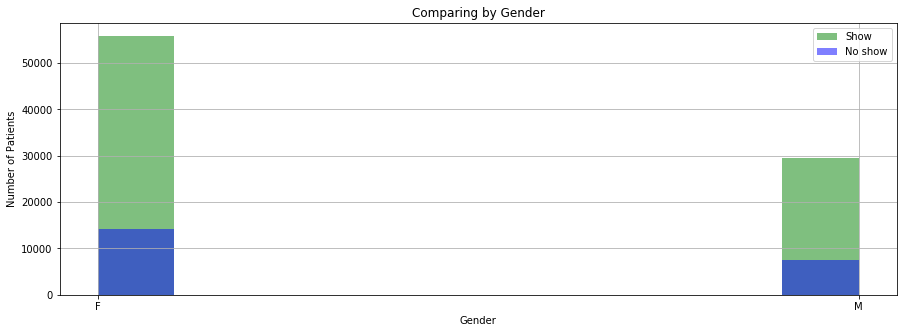

In [62]:
committment_hist(df, 'Gender', showed, not_showed);


Showed Appointment Rate affected by Scholarship = 0.09656886304758108
Not Showed Appointment Rate affected by Scholarship = 0.11858856088560886


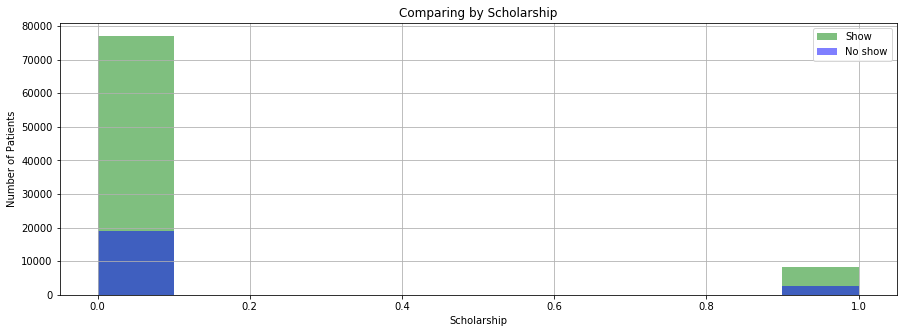

In [63]:
committment_hist(df, 'Scholarship', showed, not_showed);

Showed Appointment Rate affected by SMS_received = 0.2932584664798903
Not Showed Appointment Rate affected by SMS_received = 0.44132841328413286


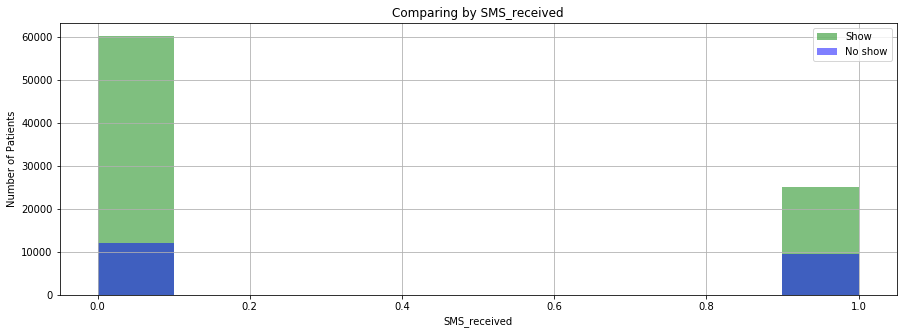

In [64]:
committment_hist(df, 'SMS_received', showed, not_showed);

Showed Appointment Rate affected by Alcoholism = 0.03145111186655257
Not Showed Appointment Rate affected by Alcoholism = 0.031226937269372694


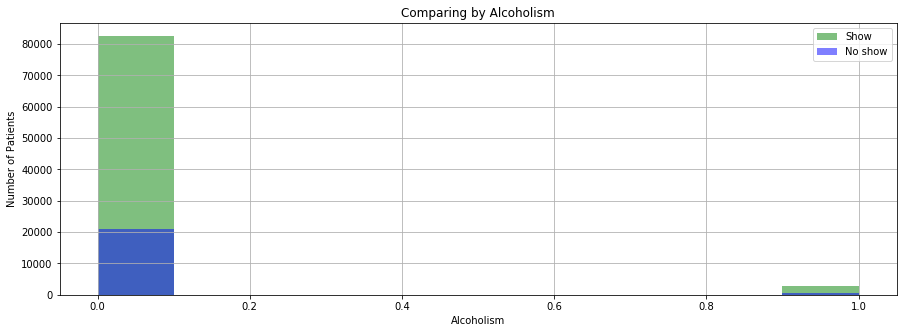

In [65]:
committment_hist(df, 'Alcoholism', showed, not_showed);

<a id='conclusions'></a>
## Conclusions

>- We can conclude that thew Age has the most effect on the appointment showing.
>- We can also conclude that SMS Receive unlogically has no effect on the appointment showing which mean it's better to review >the SMS campaign, the content, or the sending time ,...etc.
>- We can see that people with Scholarship tend to miss their appointment as 0.76% of showing VS 0.80% of patients with no scholarship showed.
>- Gender also is not affecting the results as 0.796 F Vs 0.799 M showing percentage found.

## Limitations
>It could be helpful if the data set contains the working status as a feature which will be representive with the existed features.
> Also the working hours with the neighbourhood feature will give a good representation as well.


## Summary

> For most of the features the Age has the most effect on showing status as the average of the age for people who will be most likely to show up is 39.0 and the average age for people who are not likely to show up is 35.3. 




In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0